In [86]:
#imports
#numpy,pandas,scipy,math,matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
#%matplotlib inline # feature imp

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split #sklearn module 'cross_validation' has been retired in favor of the model 'model_selection'

#classification 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

from sklearn.linear_model import RandomizedLasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV#hyper parameter tuning 
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics



In [3]:
#data
rawData = pd.read_csv('C:\\Users\Rahul\Documents\Data Analytics Certification\Course 5\Task3\credit1_t2_output.csv',header=0)
#rawData = pd.read_csv('C:\\Users\Rahul\Documents\Data Analytics Certification\Course 5\Task3\default of credit card clients.csv',header=0)

rawData.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,<100k,20's,3913,3102,689,0,0,0,0,689,...,1,0,0,0,0,0,0,0,0,0
1,100-300k,20's,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,1,0,0,0,0,0,0
2,<100k,30's,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,1,0,0,0,0,0,0,0
3,<100k,30's,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,1,0,0,0,0,0,0,0
4,<100k,50's,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,1,0,0,0,0,0,0,0


In [4]:
rawData.info(verbose=True, null_counts=True)
#rawData.info() -> doesnt display athe list

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 104 columns):
LIMIT_BAL                     29507 non-null object
AGE                           30000 non-null object
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                      30000 non-null int64
PAY_AMT2                      30000 non-null int64
PAY_AMT3                      30000 non-null int64
PAY_AMT4                      30000 non-null int64
PAY_AMT5                      30000 non-null int64
PAY_AMT6                      30000 non-null int64
default payment next month    30000 non-null int64
20's                          30000 non-null int64
30's                          30000 non-null int64
40's                 

In [5]:
header = rawData.dtypes.index
print(header)

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       ...
       'PAY_6_-2', 'PAY_6_-1', 'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4',
       'PAY_6_5', 'PAY_6_6', 'PAY_6_7', 'PAY_6_8'],
      dtype='object', length=104)


In [6]:
pd.set_option('display.max_columns', None)

In [7]:
#features
#1. Select the features


features = rawData.iloc[:,11:22]
print('Summary of feature sample')
features.head()

Summary of feature sample


,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,20's,30's,40's,50's,60's,70's,<100k
0,0,0,0,1,1,0,0,0,0,0,1
1,1000,0,2000,1,1,0,0,0,0,0,0
2,1000,1000,5000,0,0,1,0,0,0,0,1
3,1100,1069,1000,0,0,1,0,0,0,0,1
4,9000,689,679,0,0,0,0,1,0,0,1


In [8]:
#2. Select the Dependent Variable

depVar = rawData['PAY_AMT6']

In [9]:
#3. Establish the training set for the X-variables or Feature space (first 1000 rows: only for this example you
#will still follow a 70/30 split for your final models)

#Training Set (Feature Space: X Training)
X_train = (features[: 1000])
X_train.head()

,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,20's,30's,40's,50's,60's,70's,<100k
0,0,0,0,1,1,0,0,0,0,0,1
1,1000,0,2000,1,1,0,0,0,0,0,0
2,1000,1000,5000,0,0,1,0,0,0,0,1
3,1100,1069,1000,0,0,1,0,0,0,0,1
4,9000,689,679,0,0,0,0,1,0,0,1


In [10]:
#4. Establish the training set for the Y-variable or dependent variable (the number of rows much match the X-training set)
#Dependent Variable Training Set (y Training)

y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
print('*****')
y_train.head()

The number of observations in the Y training set are: 1000
*****


0       0
1    2000
2    5000
3    1000
4     679
Name: PAY_AMT6, dtype: int64

In [11]:
y_train.head()

0       0
1    2000
2    5000
3    1000
4     679
Name: PAY_AMT6, dtype: int64

In [12]:
#5.Establish the testing set for the X-Variables or Feature space

#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  20's  30's  \
29900         0         0         0                           1     1     0   
29901      1563      1208       781                           0     1     0   
29902      4448      4519      5003                           0     0     1   
29903        99    172104     30013                           0     0     1   
29904      2000      1000      1462                           1     0     1   

       40's  50's  60's  70's  <100k  
29900     0     0     0     0      1  
29901     0     0     0     0      1  
29902     0     0     0     0      0  
29903     0     0     0     0      0  
29904     0     0     0     0      1  


In [13]:
#6. Establish Ground truth 
#Ground Truth (y_test) 

y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y testing set are:',str(y_test_count))
y_test.head()

The number of observations in the Y testing set are: 100


29900        0
29901      781
29902     5003
29903    30013
29904     1462
Name: PAY_AMT6, dtype: int64

In [14]:
#Cross Validation
#In previous courses you used various methods for implementing cross validation to help prevent overfitting.
#In Sci-Kit Learn there is a pre-built function that makes this very easy to implement. Here is a quick example:

#As we have already noted we'll be using four 'divisions' of the data:

#Training Data is divided into two parts: X-train and y_train
#Testing data follows the same rules and contains two sets: X_test and y_test (ground truth)
#In order to use these for Cross Validation we must first import the package (or module) into our project as follows:

In [15]:
from sklearn.cross_validation import train_test_split

C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
#Now we can implement Cross Validation anytime we need to by simply running the following on the X and Y training sets:

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [17]:
#We can also use the shape function to double check that the split was made as needed:

X_train.shape, X_test.shape

((750, 11), (250, 11))

In [18]:
#Since we've already established out training and testing sets we can easily cross validate by using 
#"sklearn.cross_validation" on our datasets as follows:

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((562, 11), (188, 11))

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression(n_jobs=10)


In [21]:
#1.Building the models


In [22]:
#2. Establish variables that you will use for defining each model. As you can see we've established 
#three different models with the individual variable names; we'll refer to each when we build the model later.

#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [23]:
#3. While not mandatory, it is a good idea to establish a variable specifically for your features so you will
#have full control over what is being used for training. 

#features
features = rawData.iloc[:,2:13]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [24]:
#4. Again while not mandatory, but it might be a good idea to validate that the correct column
#is being used for the dependent variable:

#dependent variable
print(depVar)

0            0
1         2000
2         5000
3         1000
4          679
5          800
6        13770
7         1542
8         1000
9            0
10          66
11        3640
12           0
13           0
14        3000
15        1100
16           0
17       50000
18           0
19           0
20       33764
21           0
22        1820
23        1128
24        2000
25         997
26        1000
27        1012
28           0
29           0
         ...  
29970    16080
29971     3000
29972     4800
29973        0
29974     1000
29975     7022
29976        0
29977     5000
29978    10059
29979        0
29980     2000
29981      585
29982        0
29983     1701
29984     1000
29985        0
29986        0
29987     4005
29988     6009
29989        0
29990     2000
29991        0
29992        0
29993     2000
29994     4000
29995     1000
29996        0
29997     3100
29998     1804
29999     1000
Name: PAY_AMT6, Length: 30000, dtype: int64


In [25]:
#5. Use the model variables you established in step 2  pass the training data to them in the following format 
#(You used the train function from caret for this when you worked in R):

#model.fit(X_train,y_train)

In [26]:
#6. Random Forest
modelRF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [27]:
#7. Support Vector Regression
modelSVR.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [28]:
#8. Linear Regression
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
#Choosing the Right Model

In [30]:
#The default metric for model.score for Regression models in Sci-Kit Learn is R-Squared. 

In [31]:
#Example
#print(cross_val_score(modelRF, X_train, y_train)) 

#1st value:  The score array for test scores on each cv split. (Higher is an indicator of a better performing model)
#2nd value: The time for fitting the estimator on the train set for each cv split.
#3rd Value:  The time for scoring the estimator on the test set for each cv split.

In [32]:
#1. Random Forest Regression Model Fitting and Scoring

#Model Fitting
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train) # for checking R squared value

[ 0.96269833  0.80525522  0.99675478]


0.95998877797441451

In [33]:
#2.Support Vector Regression Model Fitting and Scoring

modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train)) 
modelSVR.score(X_train,y_train)

[-0.04892176 -0.02387297 -0.01717854]


-0.019744514124550694

In [34]:
#3. Linear Regression Model Fitting and Scoring

modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 
modelLR.score(X_train,y_train)

[ 1.  1.  1.]


1.0

In [35]:
#3)    Making Predictions with the chosen model 

In [36]:
#2. Now you can use the sqrt function and the mean_squared_error function to compose your own function for calculating RMSE:
#3. Next, establish a variable and use the included function, the ground truth, and the predictions to calculate R Squared
#as follows:

In [37]:
#Make Predictions
predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)


R Squared: 0.968
RMSE: 2769.564


In [38]:
#Plotting the Results
#The final step in the model building process (unless the model will be deployed) is often to plot a comparison between
#the known values in the test set and the predictions made by the model.

#5. To do this we can create a simple scatter plot using matplotlib as we've done previously.

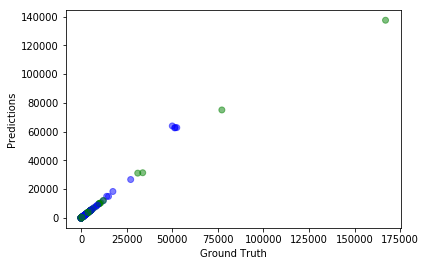

In [39]:
plt.scatter(y_test, predictions, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [40]:
#***************************** classification ********************************

In [41]:
# Already done in Task 2
#1.Cleaning and Pre-processing
#2.Covariance Estimation
#3.EDA

In [42]:
#first building algorithms without feature Engineerring or one hot encoding 

In [43]:
rawData1= rawData.copy()


In [44]:
rawData1=rawData1.drop(['LIMIT_BAL','AGE'],axis=1)

In [45]:
rawData1.info(verbose=True, null_counts=True)
#rawData.info() -> doesnt display athe list

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 102 columns):
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                      30000 non-null int64
PAY_AMT2                      30000 non-null int64
PAY_AMT3                      30000 non-null int64
PAY_AMT4                      30000 non-null int64
PAY_AMT5                      30000 non-null int64
PAY_AMT6                      30000 non-null int64
default payment next month    30000 non-null int64
20's                          30000 non-null int64
30's                          30000 non-null int64
40's                          30000 non-null int64
50's                          30000 non-null int64
60's                   

In [46]:
#1. Select the features
#features
#variableName1 = rawData['''default payment next month']
features_c= rawData1.iloc[:,13:104]
print(features_c)
print('Summary of feature sample')
features_c.head()



       20's  30's  40's  50's  60's  70's  <100k  100-300k  300-500k  \
0         1     0     0     0     0     0      1         0         0   
1         1     0     0     0     0     0      0         1         0   
2         0     1     0     0     0     0      1         0         0   
3         0     1     0     0     0     0      1         0         0   
4         0     0     0     1     0     0      1         0         0   
5         0     1     0     0     0     0      1         0         0   
6         1     0     0     0     0     0      0         0         1   
7         1     0     0     0     0     0      1         0         0   
8         1     0     0     0     0     0      0         1         0   
9         0     1     0     0     0     0      1         0         0   
10        0     1     0     0     0     0      0         1         0   
11        0     0     0     1     0     0      0         1         0   
12        0     0     1     0     0     0      0         0      

,20's,30's,40's,50's,60's,70's,<100k,100-300k,300-500k,500-700k,700-900k,900k-1M,SEX_1,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-2,PAY_0_-1,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-2,PAY_2_-1,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-2,PAY_3_-1,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-2,PAY_4_-1,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-2,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [47]:
#2. Select the Dependent Variable

#dependent variable
depVar_c = rawData1['default payment next month']

In [48]:
#Note- Important - Easy way to split the code
#from sklearn.model_selection import train_test_split
#xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [49]:
#Training Set (Feature Space: X Training)
X_train_c = (features_c[: 20000])
X_train_c.head()

,20's,30's,40's,50's,60's,70's,<100k,100-300k,300-500k,500-700k,700-900k,900k-1M,SEX_1,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-2,PAY_0_-1,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-2,PAY_2_-1,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-2,PAY_3_-1,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-2,PAY_4_-1,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-2,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [50]:
#Dependent Variable Training Set (y Training)
y_train_c = depVar_c[: 20000]
y_train_count_c = len(y_train_c.index)
print('The number of observations in the Y training set are:',str(y_train_count_c))
y_train_c.head()


The number of observations in the Y training set are: 20000


0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [51]:
#Testing Set (X Testing)
X_test_c = features_c[-10000:]
X_test_count_c = len(X_test_c.index)
print('The number of observations in the feature testing set is:',str(X_test_count_c))
#print(X_test_c.head())

The number of observations in the feature testing set is: 10000


In [52]:
#Ground Truth (y_test) 
y_test_c = depVar_c[-10000:]
y_test_count_c = len(y_test_c.index)
print('The number of observations in the Y training set are:',str(y_test_count_c))
y_test_c.head()

The number of observations in the Y training set are: 10000


20000    1
20001    0
20002    0
20003    0
20004    0
Name: default payment next month, dtype: int64

In [53]:
#cross validatiaon
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_train_c, y_train_c)
X_train_c.shape, X_test_c.shape

((15000, 89), (5000, 89))

In [54]:
#1. Decision Tree Model Fitting and Scoring

#Model Fitting
dc=DecisionTreeClassifier()
clf_c = dc.fit(X_train_c, y_train_c)
print(cross_val_score(clf_c, X_train_c, y_train_c))
clf_c.score(X_train_c,y_train_c)
# super fast in processing

[ 0.76324735  0.7558      0.75775155]


0.89666666666666661

In [55]:
y_pred_c = clf_c.predict(X_test_c)
print('Confusion Matrix : \n' + str(confusion_matrix(y_test_c,y_pred_c)))

print('Accuracy Score : ' + str(accuracy_score(y_test_c,y_pred_c)))
print('Precision Score : ' + str(precision_score(y_test_c,y_pred_c)))
print('Recall Score : ' + str(recall_score(y_test_c,y_pred_c)))
print('F1 Score : ' + str(f1_score(y_test_c,y_pred_c)))

Confusion Matrix : 
[[3464  427]
 [ 726  383]]
Accuracy Score : 0.7694
Precision Score : 0.472839506173
Recall Score : 0.345356176736
F1 Score : 0.399166232413


In [56]:
#2. Logistic Regression Model Fitting and Scoring
logreg = LogisticRegression()
lr_c = logreg.fit(X_train_c, y_train_c)
print(cross_val_score(lr_c, X_train_c, y_train_c))
lr_c.score(X_train_c,y_train_c)


#slow when compared to DTM

[ 0.81023795  0.8094      0.81176235]


0.81259999999999999

In [57]:
y_pred_c = lr_c.predict(X_test_c)
print('Confusion Matrix : \n' + str(confusion_matrix(y_test_c,y_pred_c)))

print('Accuracy Score : ' + str(accuracy_score(y_test_c,y_pred_c)))
print('Precision Score : ' + str(precision_score(y_test_c,y_pred_c)))
print('Recall Score : ' + str(recall_score(y_test_c,y_pred_c)))
print('F1 Score : ' + str(f1_score(y_test_c,y_pred_c)))


Confusion Matrix : 
[[3692  199]
 [ 694  415]]
Accuracy Score : 0.8214
Precision Score : 0.675895765472
Recall Score : 0.374211000902
F1 Score : 0.481717933836


In [58]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score


In [59]:
#3. K Nearest Neighbours Model Fitting and Scoring
#knn=KNeighborsClassifier()
knn=KNeighborsClassifier(n_neighbors=4)
knn=knn.fit(X_train_c,y_train_c)
print(cross_val_score(knn, X_train_c, y_train_c))
knn.score(X_train_c,y_train_c)
knn.score(X_train_c,y_train_c)



#knn_c=knn.fit(X_train_c,y_train_c)
#print(cross_val_score(knn_c, X_train_c, y_train_c))
#knn_c.score(X_train_c,y_train_c)
#slowest of first 3

[ 0.78704259  0.785       0.78895779]


0.8182666666666667

In [60]:
y_pred_c = knn.predict(X_test_c)
print('Confusion Matrix : \n' + str(confusion_matrix(y_test_c,y_pred_c)))

print('Accuracy Score : ' + str(accuracy_score(y_test_c,y_pred_c)))
print('Precision Score : ' + str(precision_score(y_test_c,y_pred_c)))
print('Recall Score : ' + str(recall_score(y_test_c,y_pred_c)))
print('F1 Score : ' + str(f1_score(y_test_c,y_pred_c)))



#y_pred_c = knn_c.predict(X_test_c)
#print('Confusion Matrix : \n' + str(confusion_matrix(y_test_c,y_pred_c)))

#print('Accuracy Score : ' + str(accuracy_score(y_test_c,y_pred_c)))
#print('Precision Score : ' + str(precision_score(y_test_c,y_pred_c)))
#print('Recall Score : ' + str(recall_score(y_test_c,y_pred_c)))
#print('F1 Score : ' + str(f1_score(y_test_c,y_pred_c)))

Confusion Matrix : 
[[3613  278]
 [ 802  307]]
Accuracy Score : 0.784
Precision Score : 0.524786324786
Recall Score : 0.276825969342
F1 Score : 0.362455726092


In [61]:
#4. SVC Fitting and Scoring
svc=SVC()
svc_c=svc.fit(X_train_c,y_train_c)
#svc_c=SVC().fit(X_train_c,y_train_c)

print(cross_val_score(svc_c, X_train_c, y_train_c))
svc_c.score(X_train_c,y_train_c)

[ 0.80803839  0.8092      0.80916183]


0.80940000000000001

In [62]:
y_pred_c = svc_c.predict(X_test_c)
print('Confusion Matrix : \n' + str(confusion_matrix(y_test_c,y_pred_c)))

print('Accuracy Score : ' + str(accuracy_score(y_test_c,y_pred_c)))
print('Precision Score : ' + str(precision_score(y_test_c,y_pred_c)))
print('Recall Score : ' + str(recall_score(y_test_c,y_pred_c)))
print('F1 Score : ' + str(f1_score(y_test_c,y_pred_c)))

Confusion Matrix : 
[[3723  168]
 [ 722  387]]
Accuracy Score : 0.822
Precision Score : 0.697297297297
Recall Score : 0.348963029757
F1 Score : 0.465144230769


In [63]:
rawData1.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,20's,30's,40's,50's,60's,70's,<100k,100-300k,300-500k,500-700k,700-900k,900k-1M,SEX_1,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-2,PAY_0_-1,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-2,PAY_2_-1,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-2,PAY_3_-1,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-2,PAY_4_-1,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-2,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


Optimal number of features : 28


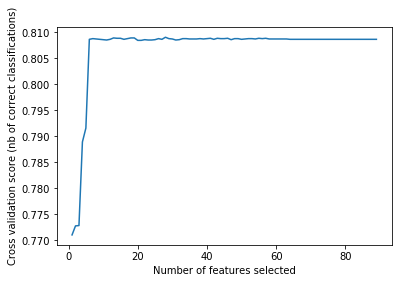

[ 0.80823835  0.8086      0.81016203]
[False False False False False False False False False False False False
 False False False False False False False False False  True  True  True
  True  True  True  True  True  True  True  True False False False False
  True  True  True  True  True  True  True  True  True False False False
 False False False False False False False  True False False False False
 False  True False False False False False False  True False False False
 False False False False False False False  True  True  True False False
 False False  True False  True]
[39 38 49 54 42 58 43 48 53 45 52 56 41 44 55 47 46 40 50 37 51  1  1  1  1
  1  1  1  1  1  1  1 62 59 30 20  1  1  1  1  1  1  1  1  1 21 57 12 13 14
 15  8 11  9  7  1 10 60 26 25 27  1 24 28 29 23 18 16  1 31 33 34 32 36 35
 17 22 19 61  1  1  1  4  3  2  5  1  6  1]
[(1, 'MARRIAGE_0'), (1, 'MARRIAGE_1'), (1, 'MARRIAGE_2'), (1, 'MARRIAGE_3'), (1, 'PAY_0_-1'), (1, 'PAY_0_-2'), (1, 'PAY_0_0'), (1, 'PAY_0_1'), (1, 

In [64]:
#1.RFE - SVC
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv_svc = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv_svc_fit=rfecv_svc.fit(X_train_c,y_train_c)

print("Optimal number of features : %d" % rfecv_svc_fit.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv_svc_fit.grid_scores_) + 1), rfecv_svc_fit.grid_scores_)
plt.show()

print(cross_val_score(rfecv_svc_fit, X_train_c, y_train_c))
rfecv_svc_fit.score(X_train_c,y_train_c)

# print summaries for the selection of attributes
print(rfecv_svc_fit.support_)
print(rfecv_svc_fit.ranking_)
#print (sorted(zip(map(lambda x: round(x, 4), rfe_svc.ranking_), names)))
print (sorted(zip(map(lambda x: round(x, 4), rfecv_svc_fit.ranking_), features_c)))

In [65]:
y_pred_svc_rfe = rfecv_svc_fit.predict(X_test_c)
print('Confusion Matrix : \n' + str(confusion_matrix(y_test_c,y_pred_svc_rfe)))

print('Accuracy Score : ' + str(accuracy_score(y_test_c,y_pred_svc_rfe)))
print('Precision Score : ' + str(precision_score(y_test_c,y_pred_svc_rfe)))
print('Recall Score : ' + str(recall_score(y_test_c,y_pred_svc_rfe)))
print('F1 Score : ' + str(f1_score(y_test_c,y_pred_svc_rfe)))

Confusion Matrix : 
[[3719  172]
 [ 713  396]]
Accuracy Score : 0.823
Precision Score : 0.697183098592
Recall Score : 0.357078449053
F1 Score : 0.472271914132


Optimal number of features : 28


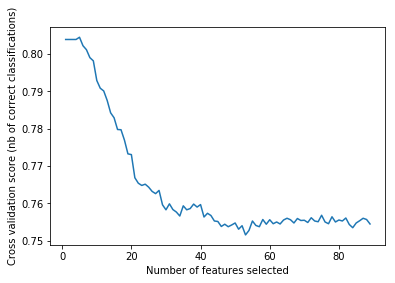

[ 0.80303939  0.8032      0.80376075]
[False False False False False False False False False False False False
 False False False False False False False False False  True  True  True
  True  True  True  True  True  True  True  True False False False False
  True  True  True  True  True  True  True  True  True False False False
 False False False False False False False  True False False False False
 False  True False False False False False False  True False False False
 False False False False False False False  True  True  True False False
 False False  True False  True]
[39 38 49 54 42 58 43 48 53 45 52 56 41 44 55 47 46 40 50 37 51  1  1  1  1
  1  1  1  1  1  1  1 62 59 30 20  1  1  1  1  1  1  1  1  1 21 57 12 13 14
 15  8 11  9  7  1 10 60 26 25 27  1 24 28 29 23 18 16  1 31 33 34 32 36 35
 17 22 19 61  1  1  1  4  3  2  5  1  6  1]
[(1, 'PAY_0_2'), (1, 'PAY_2_2'), (1, 'PAY_3_2'), (1, 'PAY_4_0'), (1, 'PAY_5_0'), (2, 'SEX_1'), (3, 'EDUCATION_2'), (4, "30's"), (5, "20's"), (6, "4

In [66]:
#2- RFE- Decision Tree
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv_dc = RFECV(estimator=dc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv_dc_fit=rfecv_dc.fit(X_train_c,y_train_c)

print("Optimal number of features : %d" % rfecv_svc_fit.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv_dc_fit.grid_scores_) + 1), rfecv_dc_fit.grid_scores_)
plt.show()

print(cross_val_score(rfecv_dc_fit, X_train_c, y_train_c))
rfecv_dc_fit.score(X_train_c,y_train_c)

# print summaries for the selection of attributes
print(rfecv_svc_fit.support_)
print(rfecv_svc_fit.ranking_)
#print (sorted(zip(map(lambda x: round(x, 4), rfe_svc.ranking_), names)))
print (sorted(zip(map(lambda x: round(x, 4), rfecv_dc_fit.ranking_), features_c)))

y_pred_dc_rfe = rfecv_dc_fit.predict(X_test_c)
print('Confusion Matrix : \n' + str(confusion_matrix(y_test_c,y_pred_dc_rfe)))

print('Accuracy Score : ' + str(accuracy_score(y_test_c,y_pred_dc_rfe)))
print('Precision Score : ' + str(precision_score(y_test_c,y_pred_dc_rfe)))
print('Recall Score : ' + str(recall_score(y_test_c,y_pred_dc_rfe)))
print('F1 Score : ' + str(f1_score(y_test_c,y_pred_dc_rfe)))

Optimal number of features : 70


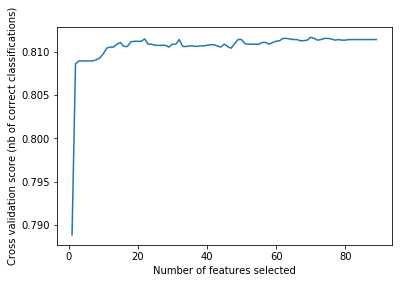

[ 0.80903819  0.8096      0.81076215]
[False False False False  True  True  True  True  True  True  True False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True False False False  True  True  True  True False False
 False  True  True  True  True  True False  True  True False  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True]
[15  4  9 14  1  1  1  1  1  1  1 19 13  2  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 16  1  1  1  1  1  1  1  1  1  1  1  1 20  1  1  1
  1 10 17 11  1  1  1  1 12  7 18  1  1  1  1  1  8  1  1  6  1  5  1  1  1
  1  1  1  1  1  1  1  1  1  1  3  1  1  1]
[(1, '100-300k'), (1, '300-500k'), (1, '500-700k'), (1, "60's"), (1, "70's"), (1, '700-900k'), (1, '<100k'), (1, 'EDUCATION_0'), (1, 'EDUCATION_1')

In [67]:
#3 Logistic Regression - RFE

# Create the RFE object and compute a cross-validated score.
model = LogisticRegression()
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfe_lr = RFECV(estimator=model, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfe_lr_fit=rfe_lr.fit(X_train_c,y_train_c)

print("Optimal number of features : %d" % rfe_lr_fit.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfe_lr_fit.grid_scores_) + 1), rfe_lr_fit.grid_scores_)
plt.show()

print(cross_val_score(rfe_lr_fit, X_train_c, y_train_c))
rfe_lr_fit.score(X_train_c,y_train_c)

# print summaries for the selection of attributes
print(rfe_lr_fit.support_)
print(rfe_lr_fit.ranking_)
#print (sorted(zip(map(lambda x: round(x, 4), rfe_svc.ranking_), names)))
print (sorted(zip(map(lambda x: round(x, 4), rfe_lr_fit.ranking_), features_c)))

y_pred_rfe_lr = rfe_lr_fit.predict(X_test_c)
print('Confusion Matrix : \n' + str(confusion_matrix(y_test_c,y_pred_rfe_lr)))

print('Accuracy Score : ' + str(accuracy_score(y_test_c,y_pred_rfe_lr)))
print('Precision Score : ' + str(precision_score(y_test_c,y_pred_rfe_lr)))
print('Recall Score : ' + str(recall_score(y_test_c,y_pred_rfe_lr)))
print('F1 Score : ' + str(f1_score(y_test_c,y_pred_rfe_lr)))

In [68]:
#KNN- RFE -> RFE cannot be applied on knn as it doesnot provide logic to do feature selection
#error : RuntimeError: The classifier does not expose "coef_" or "feature_importances_" attributes


Optimal number of features : 5


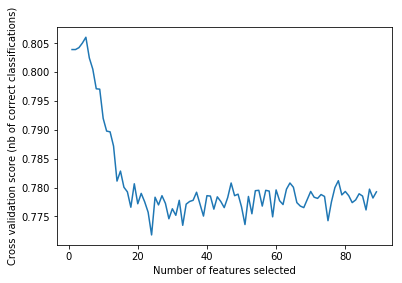

[ 0.80303939  0.8032      0.80376075]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False  True False False False False False False
 False False False False  True False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False]
[11  6 14 26 35 54  2 15 27 46 68 84 21  7 75  9  4 20 51 44 61 56  5 17 38
 37 28  1 12  1 31 45 67 70 74 73 42 16 30 63  1 36 50 57 65 72 83 32 22 24
 71  1 41 52 62 60 69 82 33 29  8 78 19 43 47 59 77 64 79 34 10 23  1 40 48
 76 81 49 80 25 18  3 13 39 55 66 53 58 85]
[(1, 'PAY_0_0'), (1, 'PAY_0_2'), (1, 'PAY_2_2'), (1, 'PAY_3_2'), (1, 'PAY_5_2'), (2, '<100k'), (3, 'PAY_6_0'), (4, 'EDUCATION_2'), (5, 'MARRIAGE_1'

In [69]:
#5 Random Forest - RFE 

# Create the RFE object and compute a cross-validated score.
model_rf = RandomForestClassifier()
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfe_rfc = RFECV(estimator=model_rf, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfe_rfc_fit=rfe_rfc.fit(X_train_c,y_train_c)

print("Optimal number of features : %d" % rfe_rfc_fit.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfe_rfc_fit.grid_scores_) + 1), rfe_rfc_fit.grid_scores_)
plt.show()

print(cross_val_score(rfe_rfc_fit, X_train_c, y_train_c))
rfe_rfc_fit.score(X_train_c,y_train_c)

# print summaries for the selection of attributes
print(rfe_rfc_fit.support_)
print(rfe_rfc_fit.ranking_)
#print (sorted(zip(map(lambda x: round(x, 4), rfe_svc.ranking_), names)))
print (sorted(zip(map(lambda x: round(x, 4), rfe_rfc_fit.ranking_), features_c)))

y_pred_rfe_rfc = rfe_rfc_fit.predict(X_test_c)
print('Confusion Matrix : \n' + str(confusion_matrix(y_test_c,y_pred_rfe_rfc)))

print('Accuracy Score : ' + str(accuracy_score(y_test_c,y_pred_rfe_rfc)))
print('Precision Score : ' + str(precision_score(y_test_c,y_pred_rfe_rfc)))
print('Recall Score : ' + str(recall_score(y_test_c,y_pred_rfe_rfc)))
print('F1 Score : ' + str(f1_score(y_test_c,y_pred_rfe_rfc)))

In [71]:

#Final- Logistic Regression - RFE - model tuning/ hyper parameter tuning to optimise the algorithm performance

#Final - Logistic Regression
model_lr = LogisticRegression(penalty='l1',dual=False,max_iter=110)
# The "accuracy" scoring is proportional to the number of correct
# classifications
#hyper paramter set
params = [
    {
     'penalty' : ['l1', 'l2'],
    # 'dual' :=['True','False'],
    # 'max_iter':=[100,110,120,130,140],
    'C' : np.logspace(-4, 4, 20),
   }
]


#making models with hyper parameter sets
model_lr1=GridSearchCV(model_lr,param_grid=params,n_jobs=-1)
#learning
model_lr1_fit=model_lr1.fit(X_train_c,y_train_c)

#the best hyper parameters set 
print("Best Hyper Parameters :\n",model_lr1_fit.best_params_)
#prediction
prediction_lr= model_lr1_fit.predict(X_test_c)
#evaluation(accuracy)
print("Accuracy Score:",metrics.accuracy_score(prediction_lr,y_test_c))
#evaluation(confusion matrix)
print("Confusion Matrix :\n",metrics.confusion_matrix(prediction_lr,y_test_c))

print('Precision Score : ',metrics.precision_score(prediction_lr,y_test_c))
print('Recall Score : ' ,metrics.recall_score(prediction_lr,y_test_c))
#print('F1 Score : ' + metrics.f1_score(prediction_rf,y_test_c))
print('F1 Score : ' + str(f1_score(y_test_c,prediction_lr)))
                    
    


Best Hyper Parameters :
 {'C': 4.2813323987193961, 'penalty': 'l2'}
Accuracy Score: 0.8216
Confusion Matrix :
 [[3690  691]
 [ 201  418]]
Precision Score :  0.376916140667
Recall Score :  0.675282714055
F1 Score : 0.483796296296


In [97]:
#plot - Logistic Regression - important features
#plot_feature_importances(model_rf,X_train_c,y_train_c,top_n=X_train.shape[1],title=i.__class__.__name__)

#cannot auto plot for lR as 'LogisticRegression' object has no attribute 'feature_importances_'



In [72]:
#Final  Decision Tree- hyper parameter tuning
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct
# classifications

#Hyper tuning is not working on rfe so had to remove it 
model_dc = DecisionTreeClassifier()

#model = DecisionTreeClassifier(random_state=1234)
params={'max_features':['auto','sqrt','log2'], 
        'min_samples_split':[2,3,4,5,6,7,8,9,10,11,12,13,14,15],
        'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
        'random_state':[123]}
dc2 =RandomizedSearchCV(model_dc,params,cv=5)
dc2_fit=dc2.fit(X_train_c,y_train_c)


dc2_fit.score(X_train_c,y_train_c)

y_pred_dc2 = dc2_fit.predict(X_test_c)
print('Confusion Matrix : \n' + str(confusion_matrix(y_test_c,y_pred_dc2)))

print('Accuracy Score : ' + str(accuracy_score(y_test_c,y_pred_dc2)))
print('Precision Score : ' + str(precision_score(y_test_c,y_pred_dc2)))
print('Recall Score : ' + str(recall_score(y_test_c,y_pred_dc2)))
print('F1 Score : ' + str(f1_score(y_test_c,y_pred_dc2)))

Confusion Matrix : 
[[3656  235]
 [ 686  423]]
Accuracy Score : 0.8158
Precision Score : 0.642857142857
Recall Score : 0.381424706943
F1 Score : 0.478777589134


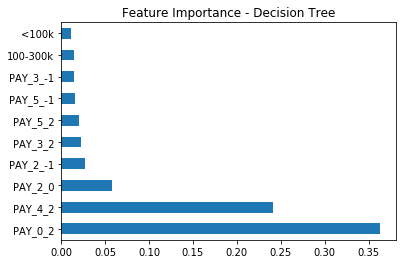

In [96]:
#plot - Decision Tree - important features
#plot_feature_importances(model_rf,X_train_c,y_train_c,top_n=X_train.shape[1],title=i.__class__.__name__)

plot=(pd.Series(dc2.best_estimator_.feature_importances_,index=X_train_c.columns)
 .nlargest(10).plot(kind='barh'))
plot.set_title('Feature Importance - Decision Tree')

plt.show(plot)#matplotlib


In [ ]:
#final - Logistic Regression

In [74]:
#Final - Random Forest 
model_rf=RandomForestClassifier()
#hyper paramter set
params={'criterion':['gini','entropy'],
        'n_estimators':[10,15],
        'max_features':['auto','sqrt','log2'],
        'min_samples_leaf':[1,2,3],
        'min_samples_split':[3,4,5,6,7],
        'random_state':[123]
        # 'n_jobs':[-1]
}
#making models with hyper parameter sets
model_rf1=GridSearchCV(model_rf,param_grid=params,n_jobs=-1)
#learning
model_rf_fit=model_rf1.fit(X_train_c,y_train_c)

#the best hyper parameters set 
print("Best Hyper Parameters :\n",model_rf_fit.best_params_)
#prediction
prediction_rf= model_rf_fit.predict(X_test_c)
#evaluation(accuracy)
print("Accuracy Score:",metrics.accuracy_score(prediction_rf,y_test_c))
#evaluation(confusion matrix)
print("Confusion Matrix :\n",metrics.confusion_matrix(prediction_rf,y_test_c))

print('Precision Score : ',metrics.precision_score(prediction_rf,y_test_c))
print('Recall Score : ' ,metrics.recall_score(prediction_rf,y_test_c))
#print('F1 Score : ' + metrics.f1_score(prediction_rf,y_test_c))
print('F1 Score : ' + str(f1_score(y_test_c,prediction_rf)))
                    
    


Best Hyper Parameters :
 {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 10, 'random_state': 123}
Accuracy Score: 0.8184
Confusion Matrix :
 [[3697  714]
 [ 194  395]]
Precision Score :  0.356176735798
Recall Score :  0.670628183362
F1 Score : 0.465253239105


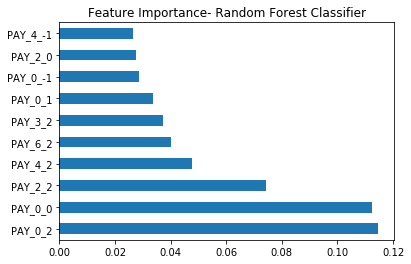

In [95]:
#plot - Randorm forest - important features
#plot_feature_importances(model_rf,X_train_c,y_train_c,top_n=X_train.shape[1],title=i.__class__.__name__)

plot=(pd.Series(model_rf1.best_estimator_.feature_importances_,index=X_train_c.columns)
 .nlargest(10).plot(kind='barh'))
plot.set_title('Feature Importance- Random Forest Classifier')

plt.show(plot)#matplotlib